# 1.- Revisar els exemples del mètode numèric proposat per R. Feynmann per a resoldre les equacions  del moviment i la seva implementació en python (script o Google Colab) així com el material  discutit a classe durant aquesta setmana.

### a) Escriure les equacions que descriuen l'evolució de la posició i de la velocitat en aquest mètode  (en general, no per un exemple específic) i compareu-les amb les equacions corresponents al  mètode de velocity Verlet.


#### Mètode de Feynman  

La peculiaritat del mètode de Feynman és la seva forma de calcular la velocitat; s'utilitza la velocitat en mig dels 
intervals de temps dt. A partir d'aquesta velocitat es calcula la posició aplicant el diferencial de temps complet, t+dt.

Per la velocitat es fa servir l'acceleració i dt/2, en canvi, la posició es càlcula fent servir la velocitat a meitat de 
l'interval. Les equacions queden de la següent manera:
$$ 
v_{hk} = v(0) + \frac{dt}{2} \cdot a 
$$
$$ 
x(1) = x(0) + dt \cdot v_{hk} 
$$


Per conèixer els valors de velocitat i posició en qualsevol punt, se substitueix v(0) i x(0) pel pas anterior al que volíem calcular;
$$ 
v_{hk} = v_{hk} + dt \cdot a 
$$
$$ 
x(i+1) = x(i) + dt \cdot v_{hk} 
$$

#### Velocity Verlet

Les equacions són ben diferents utilitzant aquest mètode, ja que es calcula la velocitat tenint en compte tot l'interval de temps, igual que fem per l'equació de la posició. Es fa a partir de l'acceleració mitjana de l'interval, que gràcies a la segona llei de Newton, permet definir la velocitat. 

Acceleració mitjana:
        $$
        a_m = \frac{a(i-1)+a(i)}{2}
        $$


Aquestes derivacions donen lloc a les següents equacions
$$
x(i) = x(i-1)+ v(i-1) \cdot dt+ \frac {a(i-1)}{2}\cdot dt^2
$$

$$
v(i) = v(i-1)+dt\cdot a_m
$$

A diferència del mètode de Feynman que utilitza la velocitat a mig camí, en aquest cas es fa servir les equacions corresponents a un moviment rectilini uniformement accelerat, però tenint en compte l'acceleració mitjana en l'equació de la velocitat.

### b) En el programa d'exemple del mètode de Velocity Verlet (i en el del mètode d'Euler també) en cada pas de temps dt avaluem l'energia total (potencial i cinètica) per tal de verificar la conservació  de l'energia. En canvi, això no està implementat en els exemples del mètode proposat per Feynmann. Perquè? Proposa una modificació que implementi aquest càlcul.

En el métode Feynman no es pot calcular l'energia del sistema en cada pas perquè la posició (x) i la velocitat (v) són parámetres evaluats en diferents instants de temps. Pel mètode de Velosity Verlet i en el del mètode d'Euler es calcula l'energia en cada pas per verificar la conservació de l'energia, és possible fer-ho perque aquets mètodes sí que evaluem els parametres esmentats en el mateix instant de temps. 

Pel mètode de Feynman no caldria evaluar en cada pas la conservació d'energia perquè les equacions estan plantejades de manera que no hagi problemes amb el reversibilitat temporal. Tot i així, si representem gràficament l'energia total del sistema, s'observa que l'error no s'acumula pas a pas, sinó que l'energia oscil·la: primer disminueix fins a un mínim i després torna a pujar fins al seu valor inicial, seguint una funció trigonomètrica.

A continuació es presenta el codi d'un moviment harmònic fent ús del mètode de Feynman amb un apartat on es representa l'energia.


El temps de simulació serà de 5.0 segons
A temps 0, la posició x serà 1.0 , la velocitat v serà 0.0 i l'acceleració serà -1.0
La velocitat a mig camí és -0.05
step 1 , x= 0.995  i a= -0.995
Step 2  t=  0.2  x= 0.98
Step 3  t=  0.3  x= 0.955
Step 4  t=  0.4  x= 0.921
Step 5  t=  0.5  x= 0.877
Step 6  t=  0.6  x= 0.825
Step 7  t=  0.7  x= 0.765
Step 8  t=  0.8  x= 0.696
Step 9  t=  0.9  x= 0.621
Step 10  t=  1.0  x= 0.54
Step 11  t=  1.1  x= 0.453
Step 12  t=  1.2  x= 0.362
Step 13  t=  1.3  x= 0.267
Step 14  t=  1.4  x= 0.169
Step 15  t=  1.5  x= 0.07
Step 16  t=  1.6  x= -0.03
Step 17  t=  1.7  x= -0.13
Step 18  t=  1.8  x= -0.228
Step 19  t=  1.9  x= -0.324
Step 20  t=  2.0  x= -0.417
Step 21  t=  2.1  x= -0.506
Step 22  t=  2.2  x= -0.589
Step 23  t=  2.3  x= -0.667
Step 24  t=  2.4  x= -0.738
Step 25  t=  2.5  x= -0.802
Step 26  t=  2.6  x= -0.857
Step 27  t=  2.7  x= -0.905
Step 28  t=  2.8  x= -0.943
Step 29  t=  2.9  x= -0.971
Step 30  t=  3.0  x= -0.99
Step 31  t=  3.1  x= -0.99

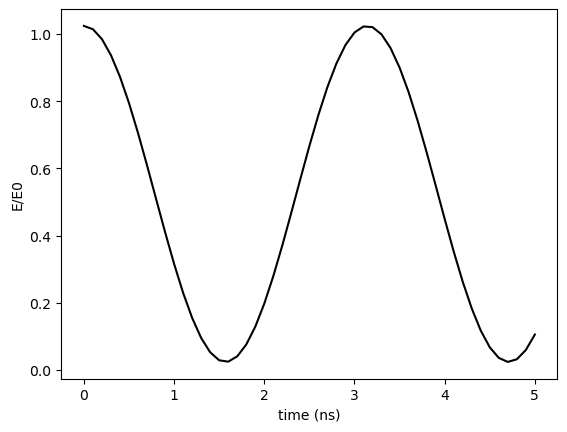

In [86]:
#Llibreries
import numpy as np
import matplotlib.pyplot as plt

#Característiques de la partícula
m=1.0                               #Massa
T=1.0                               #Periode en nanosegons
w=2.0*np.pi/T                       #Freqüència
k=m*w*w                             #Constant de força

#Condicions inicials (posició, velocitat i energia inicial)
x_0=1.0
v_0=0.0
E_0=(m/2.0)*v_0*v_0+(k/2)*x_0*x_0

#Intervals de temps on la acceleració és constant
dt=0.1
ntot=50
print("El temps de simulació serà de", dt*ntot, "segons")

#Iniciem les simulacions posant tot a 0 (posicio, velocitat i temps)
x=np.zeros(ntot+1)
v=np.zeros(ntot+1)
t=np.zeros(ntot+1)

#Condicions inicials
t[0]=0.0
x[0]=x_0
v[0]=v_0

a=-x[0]

print("A temps 0, la posició x serà", x[0], ", la velocitat v serà", v[0], "i l'acceleració serà", a)

#Càlcul de la velocitat a meitat de l'interval
v_hk=v[0]+(dt/2.0)*a
print("La velocitat a mig camí és", v_hk)

#Nova posició i acceleració en el primer pas amb temps t+dt
x[1]=x[0]+dt*v_hk
t[1]=t[0]+dt
a=-x[1]
i=1
print("step",i,", x=",x[i]," i a=",a)

#Fem un bucle per fer cada pas que sigui i<ntot, és a dir, 50 steps. Es calcula l'acceleracio, la velocitat i la posició en funcio del temps t+dt
while i<ntot:
    #L'acceleració a la posició actual
    a=-x[i]
    #Canvi de velocitat de t-dt/2 a t+dt/2
    v_hk=v_hk+a*dt
    #Nova posició a t+dt
    x[i+1]=x[i]+dt*v_hk
    #Actualitzar el temps
    t[i+1]=t[i]+dt
    #Actualitzar el contador
    i=i+1
    #Imprimir els resultats
    print('Step',i,' t= ',round(t[i],3),' x=',round(x[i],3))        #Els resultats concideixen amb els valors donats per Feynman


#Energia corresponent a cada pas
E=(m/2.0)*v_hk*v_hk+(k/2)*x*x
#Relació energia de cada pas amb energia inicial (E/E0)
RE=E/E_0
#Construim la gràfica
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Mostrar la gràfica
plt.show()

A llarg termini l'energia es conserva per la simetria

### c) Compara la modificació proposada a (b) amb el mètode de Velocity Verlet.


step 1  t=  0.0  x= 0.0
step 2  t=  0.0  x= 0.0
step 3  t=  0.0  x= 0.0
step 4  t=  0.0  x= 0.0
step 5  t=  0.0  x= 0.0
step 6  t=  0.0  x= 0.0
step 7  t=  0.0  x= 0.0
step 8  t=  0.0  x= 0.0
step 9  t=  0.0  x= 0.0
step 10  t=  0.0  x= 0.0
step 11  t=  0.0  x= 0.0
step 12  t=  0.0  x= 0.0
step 13  t=  0.0  x= 0.0
step 14  t=  0.0  x= 0.0
step 15  t=  0.0  x= 0.0
step 16  t=  0.0  x= 0.0
step 17  t=  0.0  x= 0.0
step 18  t=  0.0  x= 0.0
step 19  t=  0.0  x= 0.0
step 20  t=  0.0  x= 0.0
step 21  t=  0.0  x= 0.0
step 22  t=  0.0  x= 0.0
step 23  t=  0.0  x= 0.0
step 24  t=  0.0  x= 0.0
step 25  t=  0.0  x= 0.0
step 26  t=  0.0  x= 0.0
step 27  t=  0.0  x= 0.0
step 28  t=  0.0  x= 0.0
step 29  t=  0.0  x= 0.0
step 30  t=  0.0  x= 0.0
step 31  t=  0.0  x= 0.0
step 32  t=  0.0  x= 0.0
step 33  t=  0.0  x= 0.0
step 34  t=  0.0  x= 0.0
step 35  t=  0.0  x= 0.0
step 36  t=  0.0  x= 0.0
step 37  t=  0.0  x= 0.0
step 38  t=  0.0  x= 0.0
step 39  t=  0.0  x= 0.0
step 40  t=  0.0  x= 0.0
step 41  

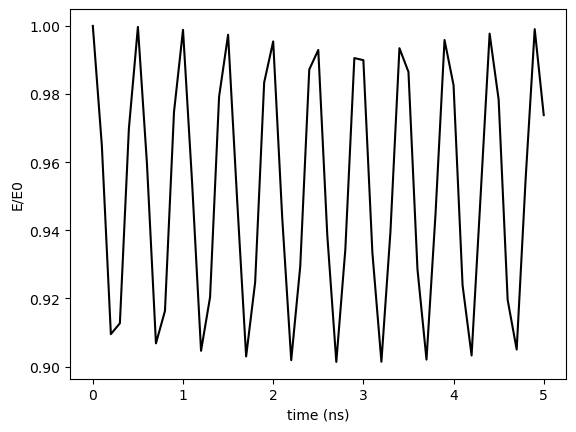

In [92]:
#Es la mateixa particula, mateixa massa, període, freqüència i constant de força. També tenim les mateixes condicios inicials
m = 1.0
T = 1.0
w = 2.0*np.pi/T
k=m*w*w

x0=1.0
v0=0.0
E0=(m/2.0)*v0*v0+(k/2)*x0*x0


dt=0.1       #Diferencial de temps
ntot=50      #Passos totals

t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

#Condicions incials
x[0] = x0
v[0] = v0
f = -k*x[0]
a[0] = f/m


#Evolució temporal
for i in range(1,ntot+1):
    print("step",i,' t= ',round(t[i],3),' x=',round(x[i],3))
    t[i] = t[i-1]+dt                                         # Actualitzar temps
    x[i] = x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt           # Nova posició
    f = -k*x[i]                                              # Força a la nova posició
    a[i] = f/m                                               # Càlcul acceleració

    # Velocitat a la nova posició
    am=(a[i-1]+a[i])/2.0
    v[i]= v[i-1]+am*dt

    #Actualitzar temps
    t[i] = t[i-1]+dt


#Energia a tots els passos
E=(m/2.0)*v*v+(k/2)*x*x
#Energia relativa (E/E0)
RE=E/E0
#Fem la gràfica de la relació d'energies respecte el temps
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Mostrar la gràfica
plt.show()

Com en el cas anterior l'energia es conserva per simetria, tot i que hi ha petites variacions al llarg del temps perquè fem una mitjana de l'acceleració que no és del tot exacta. 

#  2.- Escriviu l'equació d'Schrödinger en unitats SI i en unitats atòmiques per un exemple que hagiu estudiat en les assignatures prèvies (per exemple, a Fenòmens Quantics I, II o a qualsevol altre). Podeu revisar la definició d'unitats atòmiques en qualsevol dels links sobre aquestes unitats que teniu al Campus Virtual (per exemple el link a Libre Text) o bé dels vostres apunts d'altres assignatures.

## Exercici: Unitats atòmiques i l'equació de Schrödinger
En mecànica quàntica, sovint s'utilitzen unitats atòmiques (u.a.) per simplificar els càlculs eliminant constants fonamentals. En aquest sistema la massa de l'electró, la seva càrrega i la constant de Planck reduïda es defineixen com a 1. A més, la constant 4·π·ε_0 es defineix 1 també.

Resol els següents apartats:

#### a) Demostra que la longitud de Bohr (𝑎_0), que representa l'escala natural de distància en els àtoms d'hidrogen, és aproximadament 0.529 Å en unitats del SI. Com seria en unitats atòmiques?

##### Unitats del SI
La longitud de Bohr es defineix de la següent manera:
$$
a_{0} = \frac{4\pi \varepsilon_0 \hbar^2}{m_e e^2}
$$

Pel sistema internacional hem de substituir els valors en unitats del SI:


In [133]:
#Constants en unitats del SI per substituir directament per obtenir la longitud de Bohr
h_barra=1.055*10**(-34)           #Joules per segon (J·s)
m_e=9.109*10**(-31)               #En kg
e=1.602*10**(-19)                 #Càrrega de l'electró en C
pi_permibuit=1.112*10**(-10)     #4*pi*permitivitat del buit (F/m)

#Càlcul de la longitud de Bohr en metres
a_0=(pi_permibuit * (1.055*10**(-34))**2)/(9.109*10**(-31) * (1.602*10**(-19))**2)

#Passem la longitud de Bohr en Ángstrom
a_0_A=a_0*10**10
print(f"La longitud de Bohr utilitzant el SI és {a_0_A:.3g} Angstrom")


#Si volem en unitats atòmiques, cal substituir les coses per les dades de l'enunciat
a_0_at=(1*(1)**2)/(1*(1)**2)
print(f"La longitud de Borh en unitats atòmiques és {a_0_at:.3g}")

La longitud de Bohr utilitzant el SI és 0.529 Angstrom
La longitud de Borh en unitats atòmiques és 1


#### b) Escriu l'equació de Schrödinger per a l'àtom d'hidrogen en unitats SI i en unitats atòmiques. 

L'equació de Schrödinger per l'àtom d'hidrogen en unitats SI és:
$$
(-\frac{\hbar^2}{2 m_e}\nabla^2  -\frac{e^2}{4\pi \varepsilon_0 r}) \psi(r) = E \psi(r)
$$

Cal substituir-ho amb les definicions de l'enunciat:
$$
(- \frac{1}{2} \nabla^2 - \frac{1}{r}) \psi(r) = E \psi(r)
$$

L'equació és molt més senzilla perquè totes les constants desapareixen. Aquest és el gran avantatge de les unitats atòmiques.

#### c) Calcula l'energia de l'estat fonamental de l'àtom d'hidrogen en unitats atòmiques i converteix-la a electrovolts (eV).

Es pot deduir l'energia de l'estat fonamental de l'àtom d'H en unitats atòmiques a partir dels resultats obtinguts en els apartats anteriors. En el primer s'ha demostrat que la longitud de Bohr és 1 en aquestes unitats, i podem substituir-ho en l'equació de Schrödinger en unitats atòmiques de l'apartat b). 

Tot el que és dins del parèntesi de l'esquerra de l'igual, es queda com -\frac{1}{2}, que correspon també a l'energia fonamental. Així doncs, l'energia en Hartrees és:
$$
E_1=-\frac{1}{2}     
$$

Per convertir-ho en electrovolts utilitzem el factor de conversió:  1 Hartree = 27.221 eV

In [205]:
hartree_eV=27.211     #Factor de conversió
E_1=-0.5              #Energia fonamental unitats atòmiques

E_1_eV=E_1*hartree_eV
print(f"L'energia de l'estat fonamental és {E_1_eV: .3g}eV")


L'energia de l'estat fonamental és -13.6eV


#### d) Fent servir unitats atòmiques, estima la velocitat d’un electró en l'estat fonamental de l'àtom d'hidrogen i expressa-la com una fracció de la velocitat de la llum.

La velocitat d'electró en l'estat fonamental es pot escriure com:
$$
v=\frac{e^2}{4\pi \varepsilon_0 \hbar}
$$

Cal calcular-ho i comparar-ho amb la velocitat de la llum $2.99792·10^8 m/s$

In [203]:
#Definim la velocitat d'electró en l'estat fonamental, però amb el sistema internacional
from scipy.constants import e, hbar, epsilon_0, pi, c

v_fonamental_SI=e**2/(4*pi*epsilon_0*hbar)

print(f"La velocitat d'electró en l'estat fonamental és {v_fonamental_SI: .4g} m/s")
print(f"En canvi la velocitat de la llum és {c: .4g} m/s")
print( )

#Fracció de la velocitat de l'electró i llum
v_c=(v_fonamental_SI/c)*100                       #Ho convertim també en un percentatge
print(f"La velocitat de l'electró en l'hidrogen és aproximadament {v_c: .2g}% de la velocitat de la llum")

La velocitat d'electró en l'estat fonamental és  2.188e+06 m/s
En canvi la velocitat de la llum és  2.998e+08 m/s

La velocitat de l'electró en l'hidrogen és aproximadament  0.73% de la velocitat de la llum
